# Time Series Analysis of ASAS-SN

This time series analysis of ASAS-SN data was an endeavor to substantiate the presence of relevant planet signals for the high, proper-motion G-type star HD 20794.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits
import pandas as pd
from astropy.timeseries import LombScargle

### Fonts and Sizes

Here we keep variables to have consistent fonts and plot sizes throughout this analysis. 

In [4]:
title_font = 18
label_font = 14
text_font = 12
figsize = (9, 5)

### Stellar signals

These are variables holding the periods for a number of planets, with some being possible signals for planets. Specifically, planets c, f, and g are possible planet signals. These are found in the paper linked above. Planet d has the variable <tt>pld</tt> due to conflicts with the import of pandas. The planet c signal is reported to be the possible rotation period of HD~20794, so we will use that as our rp variable.

In [5]:
pb = 18.33
pc = 43.17
pld = 88.90
pe = 147.02
pf = 331.41
pg = 11.86
rp = pc

### Base Functions & Variables

Below is a single function and variables that are used throughout the notebook. The first code cell contains variables used in the following functions and contains the relevant planet signals from the previous code cell.

The <tt>freq_vlines</tt> function is for creating vertical lines at the proper positions for the each stellar signal. 

In [6]:
planets = [1/pb, 1/pc, 1/pld, 1/pe, 1/pf, 1/pg]
planet_labels = ['b (1/18.33)', 'c (1/43.17)', 'd (1/88.90)', 'e (1/147.02)', 'f (1/331.41)', 'g (1/11.86)']
color_array = ['red', 'black', 'green', 'orange', 'purple', 'magenta']

In [33]:
def freq_vlines():
    for p, p_l, c_a in zip(planets, planet_labels, color_array):
        plt.axvline(p, linestyle='--', color=c_a, alpha=0.7, label=p_l)
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    plt.show()

## ASAS-SN Dataset

We define a variable to contain the data from ASAS-SN. The file path would need to be adjusted based on where you have the file. We wanted to seperate between the V filter and G filter data, and not have them within the same analysis/graphs. This data only uses the G filtered data.

In [34]:
data = "/Users/andrewandmatthewfonseca/NWelch/HD20794/APJ031959.94-430360.0.csv"
table = pd.read_table(data, comment='#', delim_whitespace=True)
colnames = ['hjd', 'mag']
print(table)

              hjd camera    mag  mag_err       flux  flux_err
0    2.457691e+06     bg  4.587     0.02  56104.833  1032.329
1    2.457471e+06     bg  4.606     0.02  55124.588  1014.292
2    2.457741e+06     bg  4.617     0.02  54613.730  1004.893
3    2.457349e+06     bg  5.994     0.02  15354.468   282.522
4    2.458086e+06     bg  4.878     0.02  42909.178   789.529
..            ...    ...    ...      ...        ...       ...
214  2.458019e+06     bg  4.766     0.02  47599.959   875.839
215  2.457409e+06     bg  5.907     0.02  16644.876   306.266
216  2.457776e+06     bg  4.848     0.02  44131.941   812.028
217  2.458097e+06     bg  4.744     0.02  48552.466   893.365
218  2.457558e+06     bg  4.571     0.02  56936.706  1047.635

[219 rows x 6 columns]


## Scatter Plot

With this scatter plot, we can see the distribution of the data points. We ignore any data with magnitudes higher than 7, as well as values of 0.00.

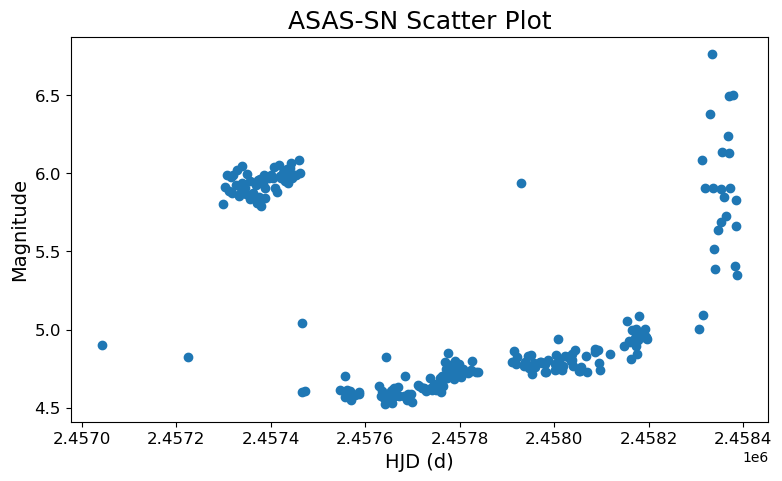

In [35]:
hjd, mag = np.loadtxt(data, skiprows=1, unpack=True, usecols=[0, 2])

plt.figure(figsize=figsize)
plt.scatter(hjd, mag)
plt.title('ASAS-SN Scatter Plot', fontsize=title_font)
plt.xlabel('HJD (d)', fontsize=label_font)
plt.ylabel('Magnitude', fontsize=label_font)
plt.tick_params(axis='both', which='major', labelsize=text_font)
plt.show()

## Histrogram

We take the data and create a histogram of the time steps. These time steps are in log base 10.

/var/folders/zd/pmykz9f551jbv4dx3xr_h_400000gn/T/ipykernel_52965/2115734790.py:4: RuntimeWarning: invalid value encountered in log10
  plt.hist(np.log10(dt))


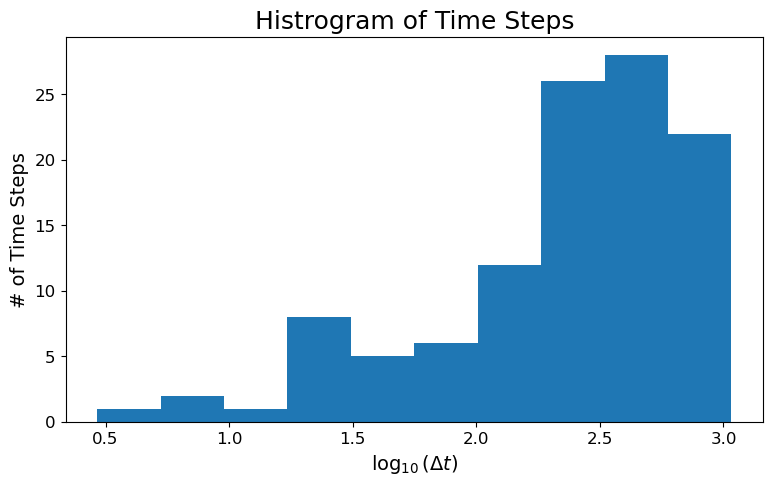

In [36]:
dt = np.diff(hjd)

plt.figure(figsize=figsize)
plt.hist(np.log10(dt))
plt.title('Histrogram of Time Steps', fontsize=title_font)
plt.xlabel(r"$\log_{10}(\Delta t)$", fontsize=label_font)
plt.ylabel('# of Time Steps', fontsize=label_font)
plt.tick_params(axis='both', which='major', labelsize=text_font)
plt.show()

## Periodogram

We create a periodogram from the LombScargle function using the data from ASAS-SN. We can see the six different vertical lines that correspond to each individual planet signal.

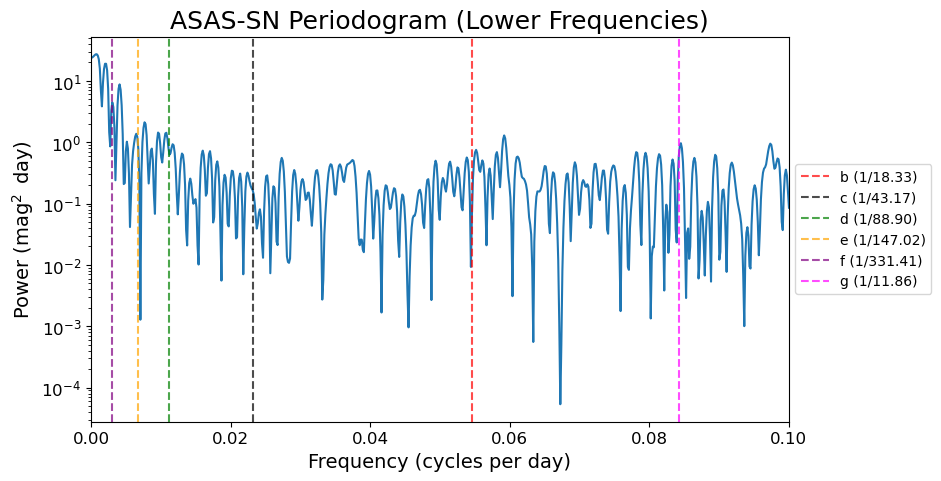

In [37]:
freq, power = LombScargle(hjd, mag, normalization = 'psd').autopower(nyquist_factor=2)

plt.figure(figsize=figsize)
plt.semilogy(freq, power)
plt.title('ASAS-SN Periodogram (Lower Frequencies)', fontsize=title_font)
plt.xlabel(r"Frequency (cycles per day)", fontsize=label_font)
plt.ylabel(r"Power ($\operatorname{mag}^2$ day)", fontsize=label_font)
plt.tick_params(axis='both', which='major', labelsize=text_font)
plt.xlim(0, 0.1)
freq_vlines()

## Spectral Window

A spectral window is created below using the data found in the ASAS-SN dataset, using a nyquist factor of 2. The red vertical line is for the planet f signal, as it may be due to interference. If this is due to interference, it would be possible to for it to be seen in the spectral window. 

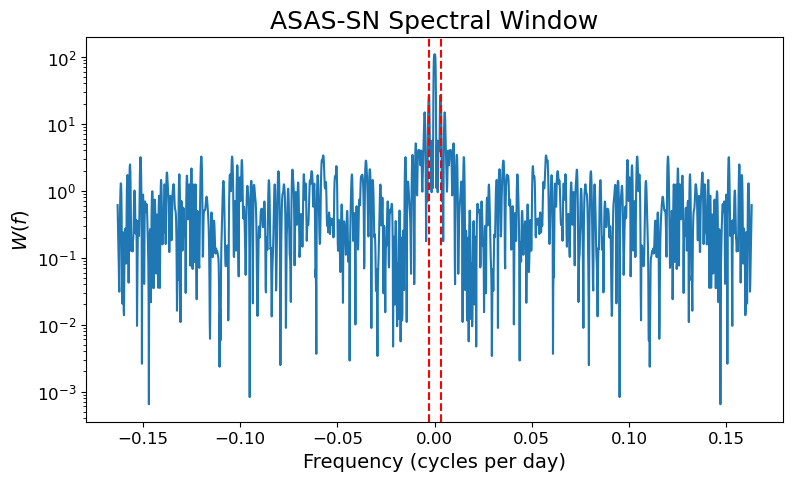

In [38]:
freq, specwin = LombScargle(hjd - hjd[0], np.ones(len(hjd)), center_data = False, fit_mean = False, normalization = 'psd').autopower(nyquist_factor=2)

plt.figure(figsize=figsize)
plt.semilogy(np.concatenate((-freq[::-1], freq[1:])), np.concatenate((specwin[::-1], specwin[1:])))
plt.title('ASAS-SN Spectral Window', fontsize=title_font)
plt.xlabel(r"Frequency (cycles per day)", fontsize=label_font)
plt.ylabel(r"$W(f)$", fontsize=label_font)
plt.axvline(x=1/pf, linestyle='--', color='red')
plt.axvline(x=-(1/pf), linestyle='--', color='red')
plt.tick_params(axis='both', which='major', labelsize=text_font)
plt.show()

## Pseudo-Window

We create a pseudo-window from the data of the ASAS-SN dataset, using a nyquist factor of 2. 

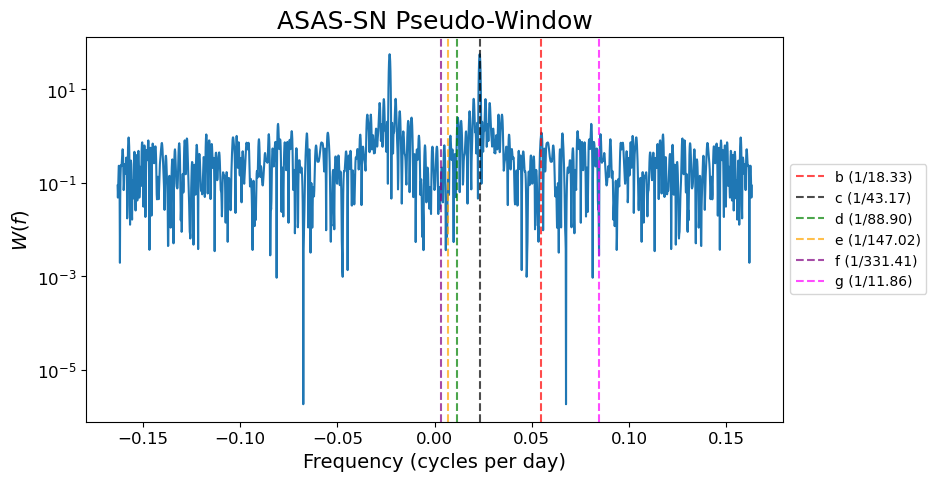

In [39]:
freq, specwin = LombScargle(hjd - hjd[0], np.sin(2*np.pi*(hjd-hjd[0])/rp), center_data = False, fit_mean = False, normalization = 'psd').autopower(nyquist_factor=2)

plt.figure(figsize=figsize)
plt.semilogy(np.concatenate((-freq[::-1], freq[1:])), np.concatenate((specwin[::-1], specwin[1:])))
plt.title('ASAS-SN Pseudo-Window', fontsize=title_font)
plt.xlabel(r"Frequency (cycles per day)", fontsize=label_font)
plt.ylabel(r"$W(f)$", fontsize=label_font)
plt.tick_params(axis='both', which='major', labelsize=text_font)
freq_vlines()